In [1]:
import pandas as pd
import numpy as np
import sys 
sys.path.append('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Codes')
from maplot import *

In [2]:
genome_types = ['gene',
                'lnc_RNA',
                'miRNA',
                'ncRNA',
                'ncRNA_gene',
                'rRNA',
                'snRNA',
                'snoRNA',
                'tRNA']

In [3]:
line_dicts = [
                {"WT_AGO1":0, "ago1":4},
                {"WT_AGO1":0, "deltaN":6},
                {"ago1":4, "deltaN":6}
            ]

In [4]:
for t in genome_types:
    for d in line_dicts:
        MAPlot.f_fC = f'/Users/siomi19/Desktop/AtAgo1 RNA-seq/featureCounts/results/AtAgo1_RNA-seq_featureCounts_{t}.txt'
        MAPlot.dir_fC_tr = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/read_count'
        MAPlot.gene_type = t
        MAPlot.drop = [0,1,2,3,4]
        MAPlot.replicates = 2
        MAPlot.age_to_column = d
        ma = MAPlot(list(d.keys())[0], list(d.keys())[1])
        ma.process_df()

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/siomi19/Desktop/AtAgo1 RNA-seq/Codes/maplot.py:89: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_DEG = df[df[method]<q_value][lfc]
/Users/siomi19/Desktop/AtAgo1 RNA-seq/Codes/maplot.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


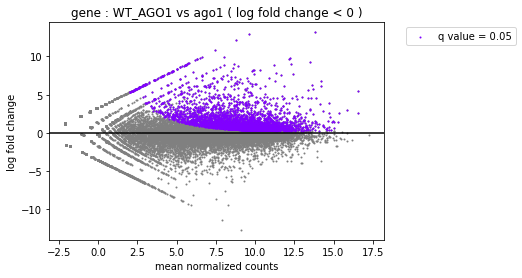

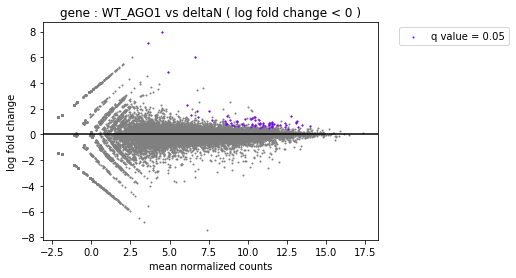

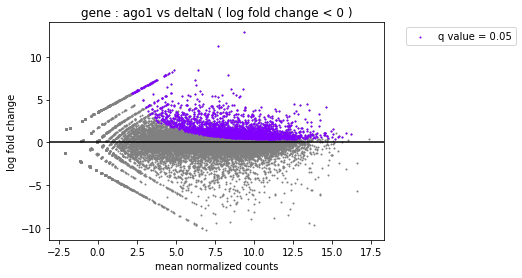

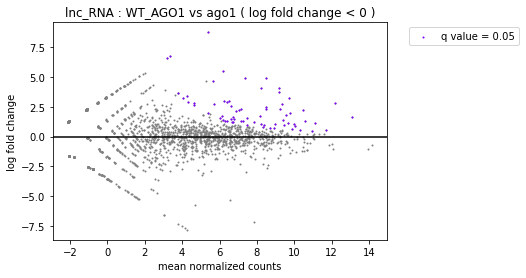

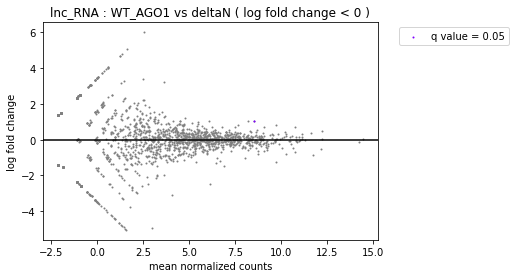

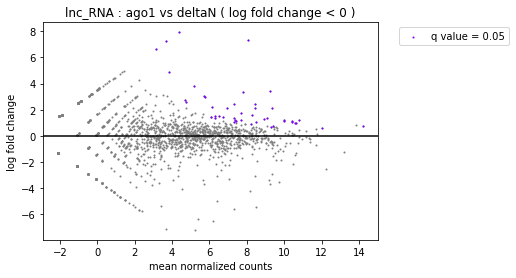

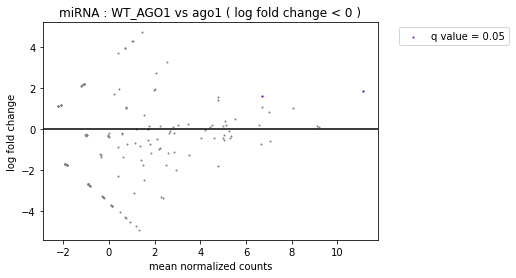

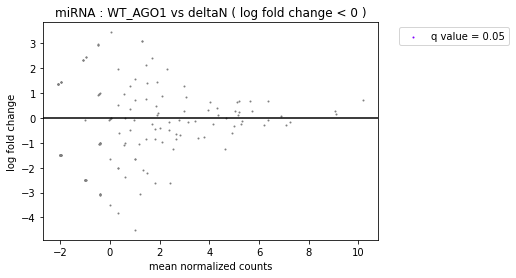

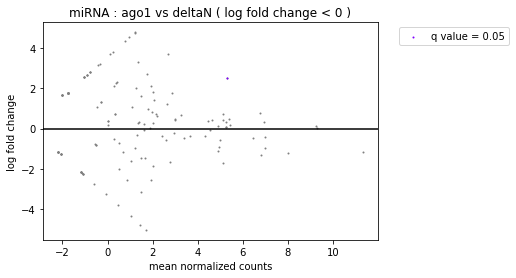

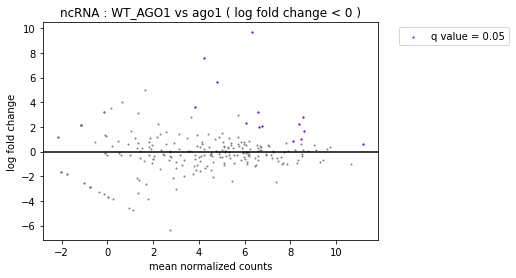

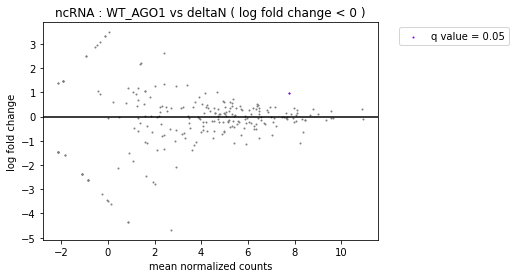

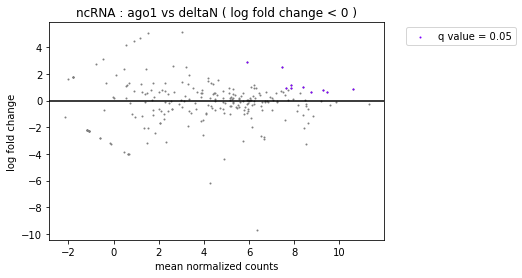

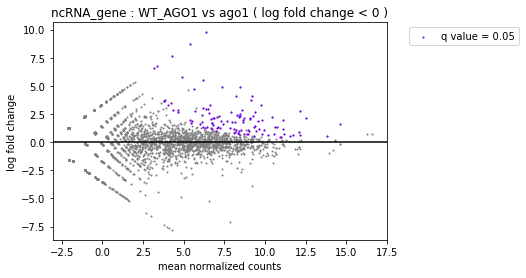

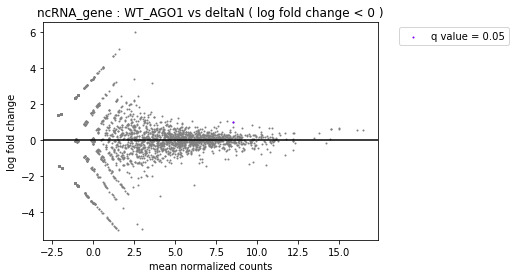

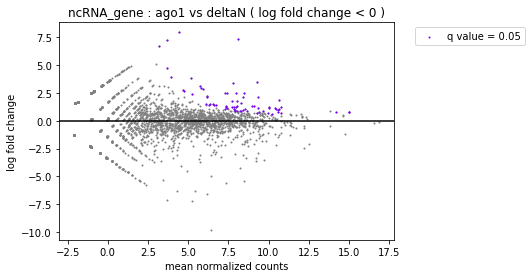

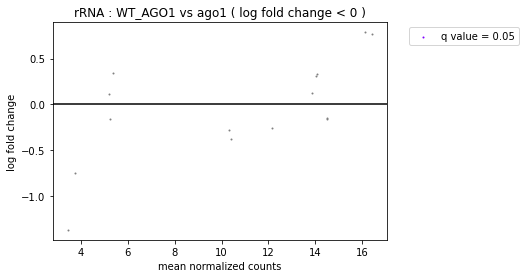

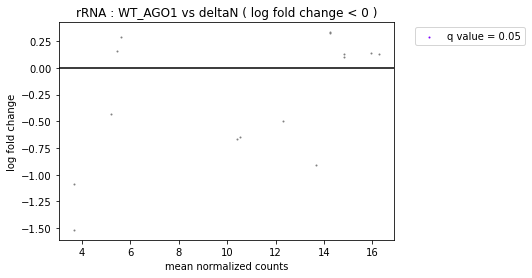

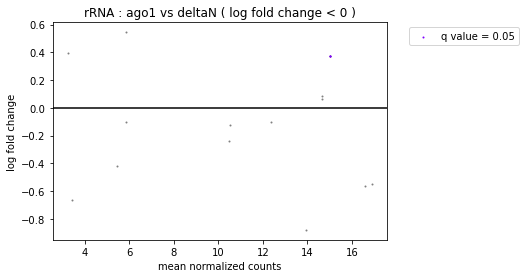

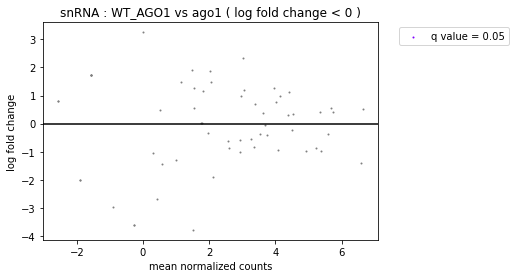

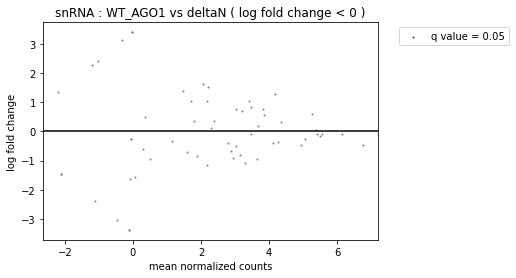

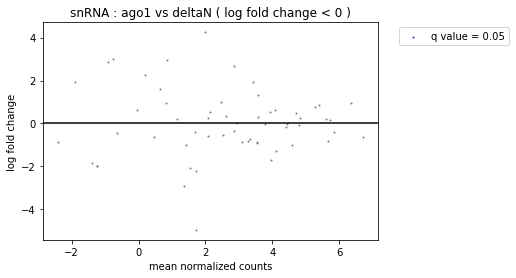

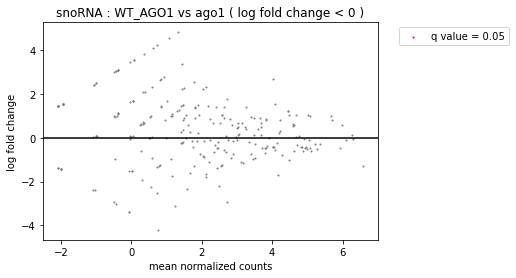

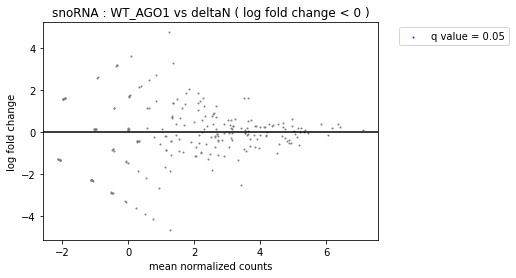

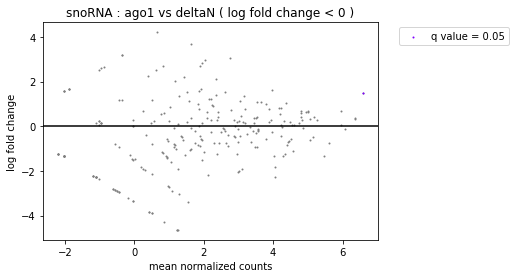

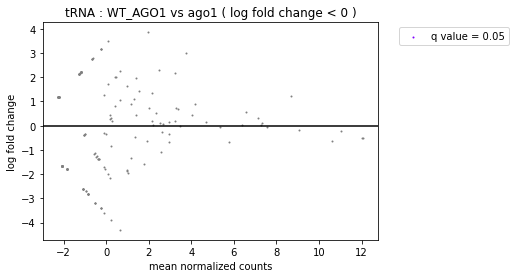

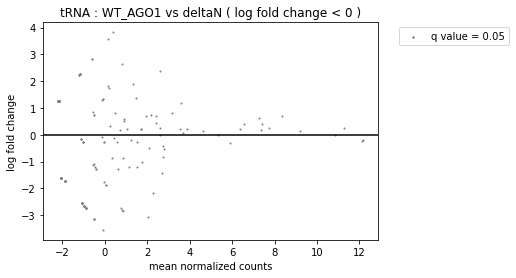

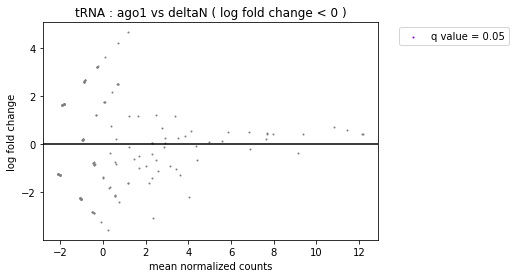

In [4]:
for t in genome_types:
    for d in line_dicts:
        MAPlot.gene_type = t
        MAPlot.upregulated = True
        MAPlot.dir_fC_tr = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG'
        MAPlot.dir_MA = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/MA/upregulated'
        MAPlot.dir_DEG = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated'
        ma = MAPlot(list(d.keys())[0], list(d.keys())[1])
        ma.plot_MA([0.05], 0)
        ma.get_DEG([0.05], 0)

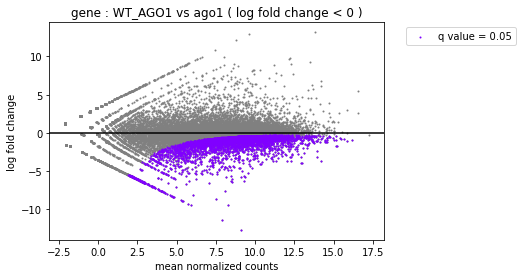

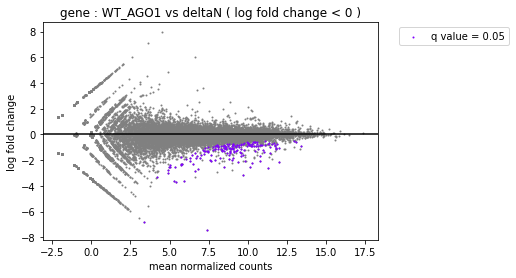

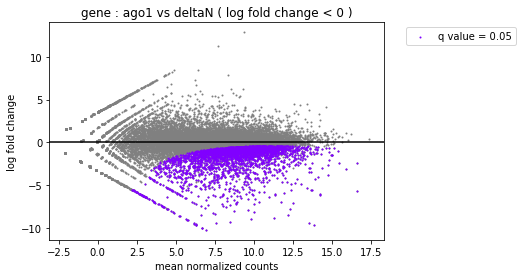

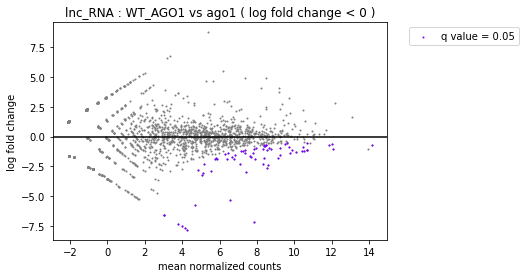

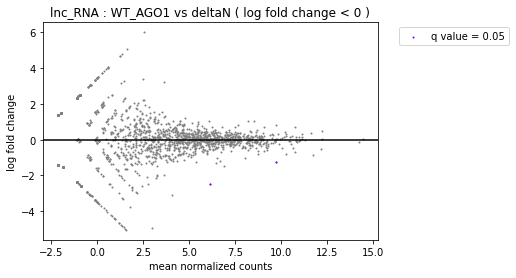

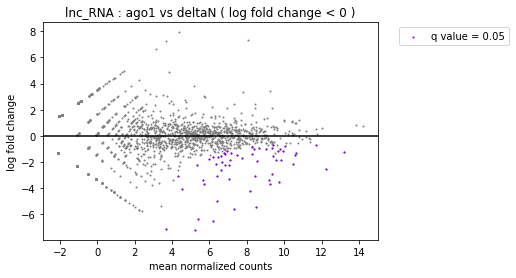

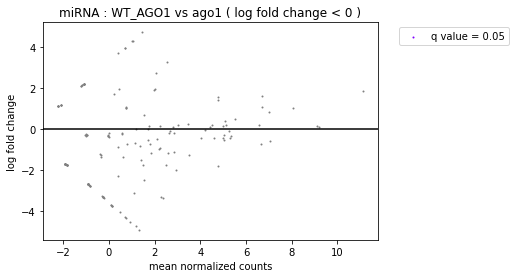

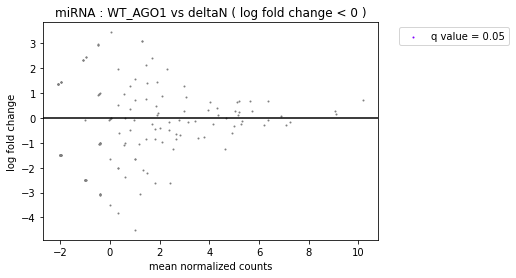

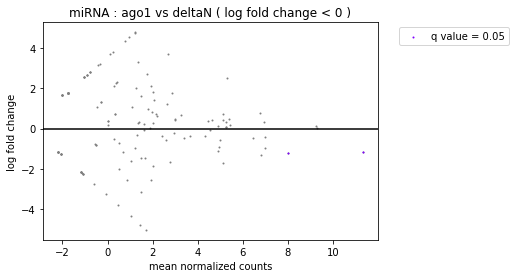

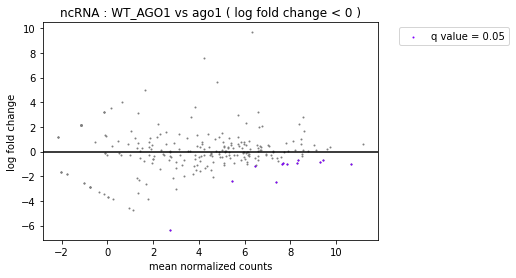

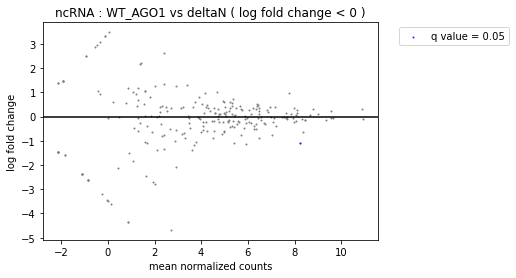

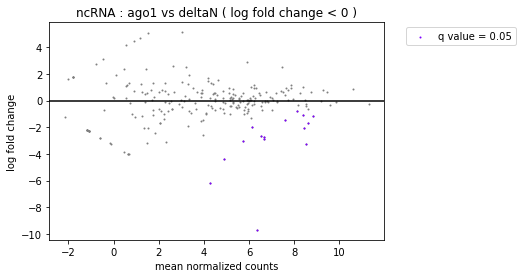

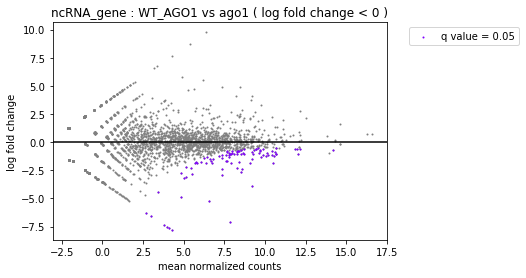

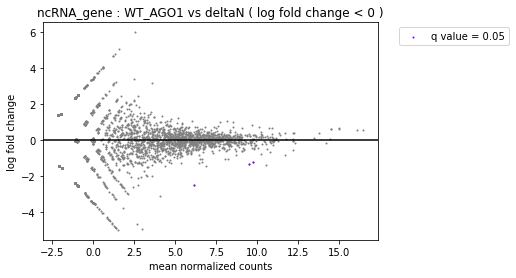

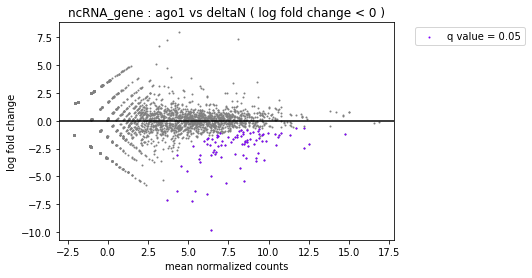

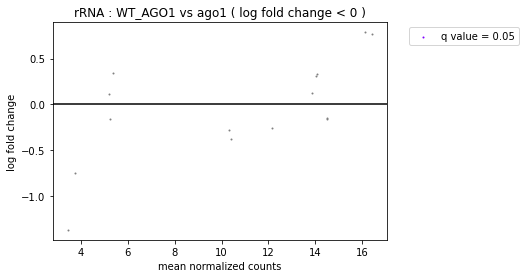

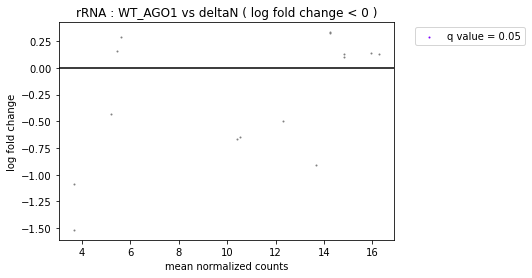

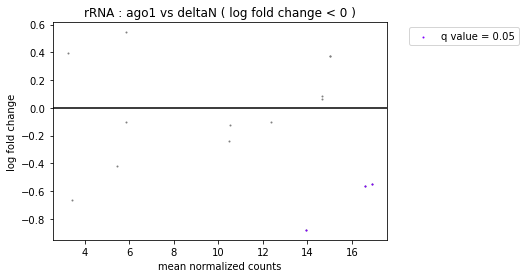

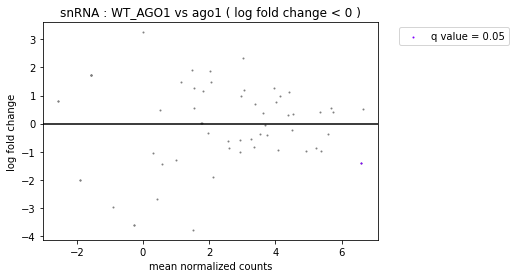

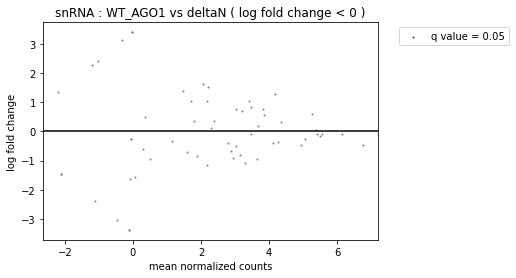

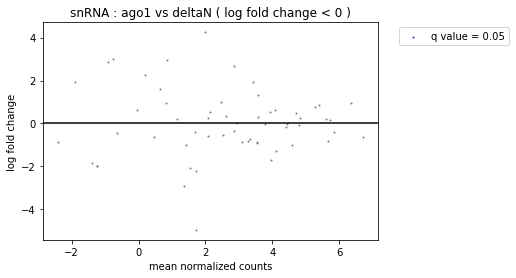

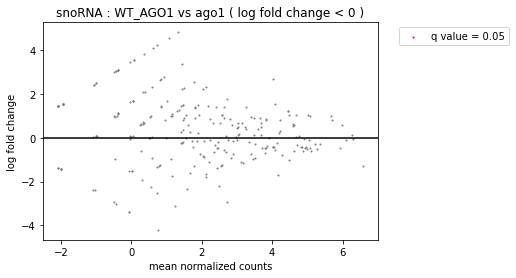

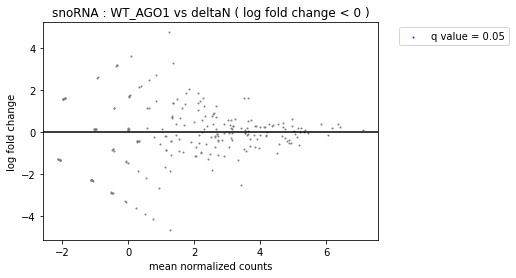

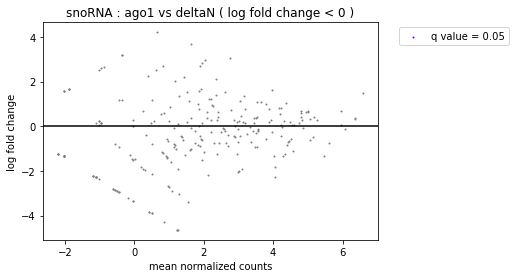

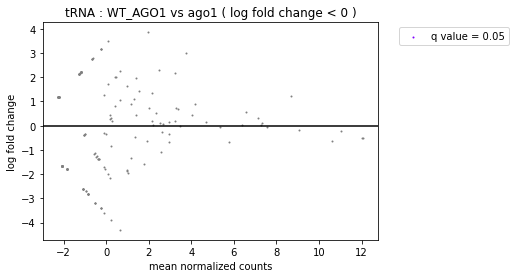

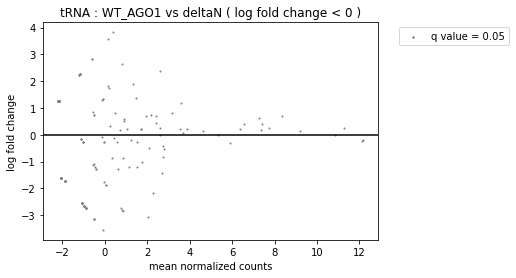

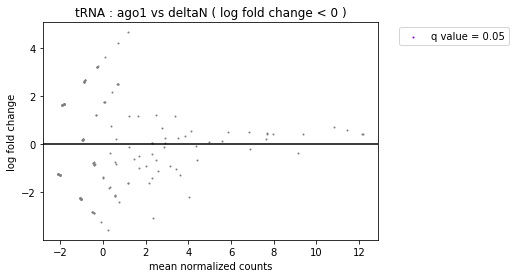

In [5]:
for t in genome_types:
    for d in line_dicts:
        MAPlot.gene_type = t
        MAPlot.upregulated = False
        MAPlot.dir_fC_tr = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG'
        MAPlot.dir_MA = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/MA/downregulated'
        MAPlot.dir_DEG = '/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated'
        ma = MAPlot(list(d.keys())[0], list(d.keys())[1])
        ma.plot_MA([0.05], 0)
        ma.get_DEG([0.05], 0)

In [28]:
df_ago1_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_ago1_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated/gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [29]:
df_deltaN_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [30]:
common_up_up = np.intersect1d(df_ago1_up.index, df_deltaN_up.index)
common_up_down = np.intersect1d(df_ago1_up.index, df_deltaN_down.index)
common_down_up = np.intersect1d(df_ago1_down.index, df_deltaN_up.index)
common_down_down = np.intersect1d(df_ago1_down.index, df_deltaN_down.index)

In [32]:
commons = [common_up_up, common_up_down, common_down_up, common_down_down]
for c in commons:
    print(len(c))

23
26
31
99


In [34]:
dfs = [df_ago1_up, df_ago1_down, df_deltaN_up, df_deltaN_down]
for d in dfs:
    print(len(d))

3903
3850
70
166


In [41]:
d_up_up = df_ago1_up.loc[common_up_up].sort_values("ranking")
d_up_down = df_ago1_up.loc[common_up_down].sort_values("ranking")
d_down_up = df_ago1_down.loc[common_down_up].sort_values("ranking")
d_down_down = df_ago1_down.loc[common_down_down].sort_values("ranking")

In [42]:
d_up_up.sort_values("ranking").to_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_up.txt', header=True, index=True, sep="\t")
d_up_down.sort_values("ranking").to_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_down.txt', header=True, index=True, sep="\t")
d_down_up.sort_values("ranking").to_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_up.txt', header=True, index=True, sep="\t")
d_down_down.sort_values("ranking").to_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_down.txt', header=True, index=True, sep="\t")

In [28]:
df_AGO1_target_miRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/miRNA/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_miRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/miRNA/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [30]:
df_AGO1_target_ncRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ncRNA/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_ncRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ncRNA/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [31]:
df_AGO1_target_ncRNA

,WT_AGO1.1,WT_AGO1.2,ago1.1,ago1.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
transcript:AT1G55525.1,2,0,41,81,28.098417,5.653396,1.221333,4.628871,3.676639e-06,5.882622e-05,1.260084e-04,11.0
transcript:AT2G07042.1,72,110,799,674,379.948713,2.775273,0.240257,11.551262,7.274403e-31,1.280295e-28,2.742450e-28,1.0
transcript:AT2G21188.1,20,56,208,142,98.421296,1.990570,0.444877,4.474426,7.661699e-06,1.007015e-04,2.157073e-04,13.0
transcript:AT2G08475.1,150,198,771,553,390.987191,1.680273,0.237587,7.072232,1.524617e-12,5.366653e-11,1.149561e-10,5.0
transcript:AT2G39675.1,91,128,675,562,336.840234,2.253193,0.241078,9.346337,9.073594e-21,7.984762e-19,1.710372e-18,2.0
transcript:AT2G39681.1,198,248,565,487,356.286550,0.988080,0.221299,4.464907,8.010350e-06,1.007015e-04,2.157073e-04,14.0
transcript:AT2G09395.1,166,209,400,390,278.290299,0.825540,0.236914,3.484549,4.929670e-04,4.566431e-03,9.781502e-03,19.0
transcript:AT3G15536.1,0,0,233,127,81.011410,9.675170,1.506886,6.420639,1.357032e-10,3.980626e-09,8.526682e-09,6.0
transcript:AT3G57157.1,14,21,232,158,97.080213,3.233373,0.444672,7.271367,3.558664e-13,1.565812e-11,3.354041e-11,4.0
transcript:AT3G61198.1,18,23,142,107,67.024347,2.352647,0.477160,4.930522,8.201010e-07,1.603753e-05,3.435312e-05,9.0


In [32]:
df_deltaN_ncRNA

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
transcript:AT4G40065.1,123,167,244,340,213.911397,0.963737,0.25083,3.8422,0.000122,0.014571,0.022985,2.0


In [33]:
df_AGO1_target_ncRNA_gene = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ncRNA_gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_ncRNA_gene = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ncRNA_gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [37]:
df_AGO1_target_ncRNA_gene.loc[df_deltaN_ncRNA_gene.index]

KeyError: "None of [Index(['gene:AT2G45685'], dtype='object')] are in the [index]"

In [36]:
df_deltaN_ncRNA_gene

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
gene:AT2G45685,221,262,465,536,365.039324,1.018554,0.238062,4.278531,0.000019,0.003584,0.024353,4.0


In [44]:
df_AGO1_target_snRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/lnc_RNA/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_snRNA = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/lnc_RNA/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [45]:
df_AGO1_target_snRNA

,WT_AGO1.1,WT_AGO1.2,ago1.1,ago1.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
transcript:AT1G05147.1,199,178,1406,790,610.130346,2.340045,0.253696,9.223816,2.867097e-20,1.725634e-18,6.950917e-18,16.0
transcript:AT1G05213.1,446,529,1273,1119,814.184788,1.111405,0.167845,6.621614,3.552979e-11,8.345167e-10,3.361464e-09,41.0
transcript:AT1G05317.1,16,22,177,141,83.917542,2.885387,0.433215,6.660409,2.730673e-11,6.574096e-10,2.648070e-09,40.0
transcript:AT1G05333.2,274,315,607,491,411.156275,0.712833,0.208580,3.417551,6.318726e-04,5.162798e-03,2.079594e-02,117.0
transcript:AT1G05347.1,731,944,2562,2201,1549.064116,1.328709,0.151680,8.759946,1.953438e-18,9.900848e-17,3.988099e-16,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
transcript:AT5G08285.1,2,4,44,21,16.611600,3.262536,0.996406,3.274304,1.059227e-03,8.095521e-03,3.260906e-02,126.0
transcript:AT5G08425.1,21,9,123,159,74.053545,3.020026,0.502918,6.005005,1.913257e-09,4.005362e-08,1.613375e-07,46.0
transcript:AT5G08870.1,42,54,186,159,105.537801,1.665289,0.356815,4.667093,3.054904e-06,4.085934e-05,1.645829e-04,72.0
transcript:AT5G08960.1,5,8,55,38,24.993983,2.662784,0.754826,3.527680,4.192179e-04,3.636998e-03,1.464996e-02,111.0


In [46]:
df_deltaN_snRNA

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
transcript:AT2G45685.1,221,262,465,536,364.915044,1.028276,0.235346,4.369203,0.000012,0.003654,0.016124,3.0
